**The Decision Tree Algorithm**

- A decision tree is a **white box** type of ML algorithm. It shares internal decision-making logic, which is not available in the **black box** type of algorithms such as with a **neural network**. Its training time is faster compared to the neural network algorithm. 

- A Decision tree can be utilized for both classification and regression problems.

**Importing Required Libraries**

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

**Loading Data**

This dataset is originally from the Indian Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.670995670995671


In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
!pip install pydotplus
import pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24657 sha256=1b71c07dd5263e562aa3559eb2e0d84d4db710fb4d76870a221d02e9d9a4815c
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


  DEPRECATION: Building 'pydotplus' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pydotplus'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [ ]:
"""
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())
"""

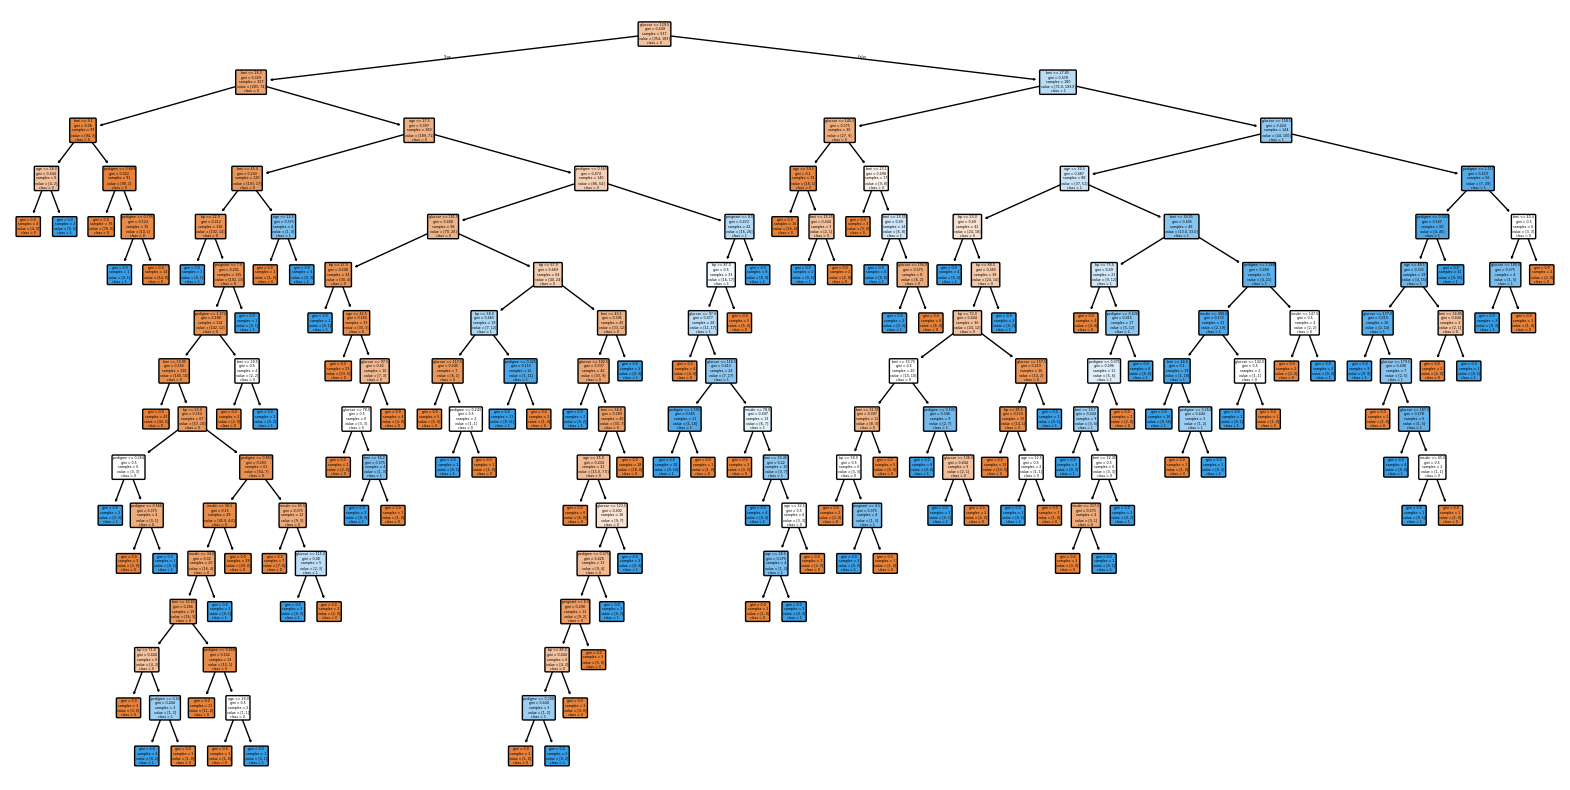

In [ ]:
# I used another version because export_graphviz will take space and time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=feature_cols, 
          class_names=['0','1'], 
          filled=True, 
          rounded=True)
plt.show()


In the decision tree chart, each internal node has a decision rule that splits the data. **Gini**, referred to as Gini ratio, measures the impurity of the node. You can say a node is **pure** when all of its records belong to the same class, such nodes known as the **leaf** node.

Here, the resultant tree is **unpruned**. This unpruned tree is unexplainable and not easy to understand. This usually causes:A very large tree, Hard to read, Overfitting (it memorizes the training data).
In the next section, let's optimize it by **pruning**.



**Optimizing Decision Tree Performance**

**criterion** : **optional (default=”gini”)** entropy

**splitter** : **string, optional (default=”best”)** This parameter allows us to choose the split strategy;“best” to choose the best split and “random” to choose the best random split.

**max_depth : int or None, optional (default=None)** or Maximum Depth of a Tree. If None, then nodes are expanded until all pure or until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In Scikit-learn, optimization of decision tree classifier performed by only **pre-pruning**. Maximum depth of the tree can be used as a control variable for pre-pruning.


In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


**Visualizing Decision Trees**

In [ ]:
"""
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())
"""

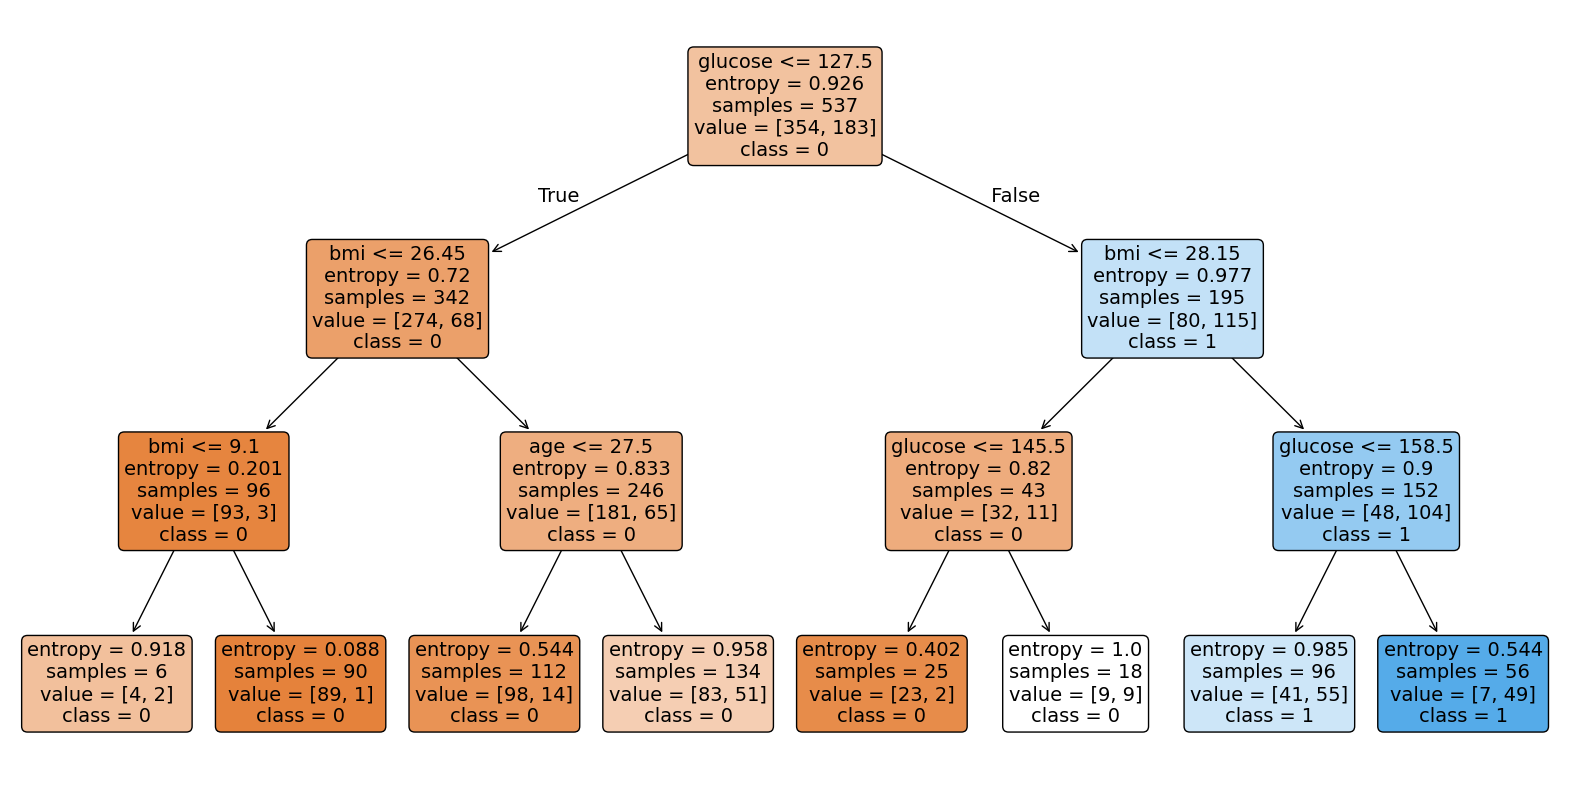

In [ ]:
# version of pyplot
plt.figure(figsize=(20, 10))

plot_tree(
    clf,
    feature_names=feature_cols,
    class_names=['0', '1'],
    filled=True,
    rounded=True
)

plt.show()